In [1]:
def function1(input1):
    return input1+" from fn1"

In [2]:
def function2(input2):
    return input2+ " from fn2"

In [3]:
def function3(input3):
    return input3+" from fn3"

In [5]:
from langgraph.graph import Graph
workflow1 = Graph()
workflow1.add_node("fun1",function1)
workflow1.add_node("fun2",function2)

In [6]:
workflow1.add_edge("fun1","fun2")

In [8]:
workflow1.set_entry_point("fun1")
workflow1.set_finish_point("fun2")

In [9]:
app = workflow1.compile()

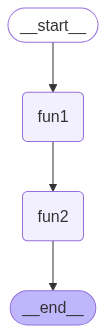

In [10]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
app.invoke("hi")

'hi from fn1 from fn2'

In [18]:
workflow2 = Graph()

In [19]:
def llm(input):
    from langchain_google_genai import ChatGoogleGenerativeAI
    model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
    output = model.invoke(input)
    return output.content
def token_counter(input):
    token=input.split()
    token_number=len(token)
    return f"total token number in the generated answer is {token_number}"

In [20]:
workflow2.add_node("LLM",llm)
workflow2.add_node("Output_token_counter",token_counter)
workflow2.add_edge("LLM","Output_token_counter")
workflow2.set_entry_point("LLM")
workflow2.set_finish_point("Output_token_counter")
app1 = workflow2.compile()

In [21]:
app1.invoke("tell me in detail about machine learning")

d:\Python\CODE\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'total token number in the generated answer is 1927'

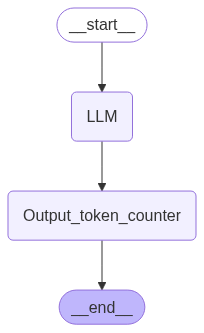

In [22]:
from IPython.display import Image, display
display(Image(app1.get_graph().draw_mermaid_png()))

In [25]:
for output in app1.stream("tell me something about ML in 100 tokens"):
    for key,value in output.items():
        print(f"here is output from {key}")
        
        print(value)
        print("_______")
        print("\n")
    

here is output from LLM
Machine learning (ML) uses algorithms to learn from data and make predictions without explicit programming. It identifies patterns and builds models to perform tasks like classification, regression, and clustering. Common applications include image recognition, spam filtering, and personalized recommendations. ML algorithms improve with more data, enabling systems to adapt and automate complex decisions.
_______


here is output from Output_token_counter
total token number in the generated answer is 53
_______


